In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


In [3]:
X_train =pd.read_parquet("data/X_train_completo.parquet")
X_test= pd.read_parquet("data/X_test_completo.parquet")
y_train=pd.read_parquet("data/y_train.parquet")
y_test=pd.read_parquet("data/y_test.parquet")

print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(40257, 51) (17253, 51) (40257, 1) (17253, 1)


In [4]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeClassifier`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the

In [8]:
hiperparameters={
    'n_estimators':randint(100,1000),
    'max_depth':randint(3,20),
    'min_samples_split':randint(2,20),
    'min_samples_leaf':randint(1,10),
    'max_features':['sqrt','log2',None],
    'bootstrap':[True,False],
    'class_weight':[None,'balanced','balanced_subsample']
}
base_model=RandomForestClassifier(criterion='gini',random_state=42)

optimizacion = RandomizedSearchCV(estimator=base_model,param_distributions=hiperparameters,n_iter=20,scoring='f1',cv=5,n_jobs=10,random_state=42,verbose=2)

optimizacion.fit(X_train,y_train)
print(optimizacion.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'bootstrap': False, 'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 16, 'n_estimators': 152}


In [10]:
model_final=optimizacion.best_estimator_


In [12]:
model_final.classes_

array([0, 1])

In [13]:
y_pred_proba = model_final.predict_proba(X_test)[:,1]
y_pred_proba

array([0.87927988, 0.92530049, 0.1789762 , ..., 0.92949744, 0.94032695,
       0.93802533], shape=(17253,))

In [17]:
y_pred= y_pred_proba> 0.5
y_pred_1 = model_final.predict(X_test)
y_pred == y_pred_1

array([ True,  True,  True, ...,  True,  True,  True], shape=(17253,))

- matriz de contingencia
- Curva roc
- Curva de aumento de la complejidad
- Curva del log likelihood

### SCORES METRICS

In [31]:
from sklearn.metrics import confusion_matrix,roc_curve,f1_score,recall_score,precision_score,accuracy_score,roc_auc_score
print(f'recall score {recall_score(y_test , y_pred)}')
print(f'precision score {precision_score(y_test , y_pred)}')
print(f'f1 score {f1_score(y_test , y_pred)}')
print(f'accuracy score {accuracy_score(y_test , y_pred)}')
print(f'roc auc score {roc_auc_score(y_test , y_pred)}')

recall score 0.9167756398281337
precision score 0.8581045637349187
f1 score 0.8864703757225434
accuracy score 0.8542862110937228
roc auc score 0.8344379191961808


### MATRIZ DE CONFUSION

<Axes: >

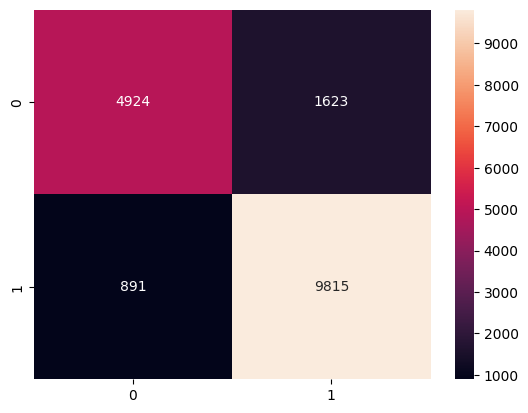

In [33]:
sns.heatmap(confusion_matrix(y_test , y_pred) ,annot=True, fmt='d')



### CURVA ROC

In [37]:
np.linspace(0,1,100)

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

Text(0, 0.5, 'tpr')

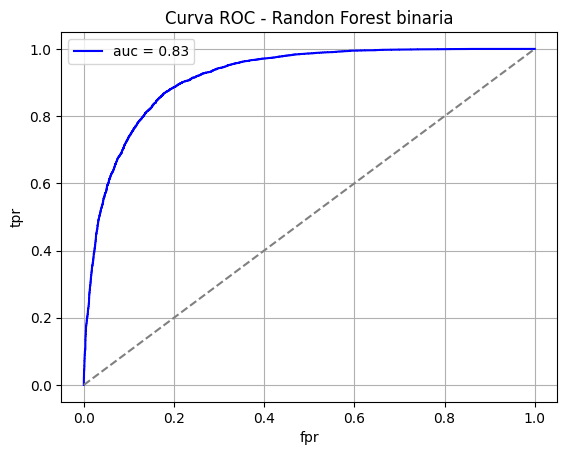

In [44]:
fpr ,tpr,threshold = roc_curve(y_test,y_pred_proba)

plt.plot(fpr,tpr ,label=f"auc = {roc_auc_score(y_test , y_pred):.2f}",color="blue")
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100), color='gray',linestyle='--')
plt.legend()
plt.grid(True)
plt.title("Curva ROC - Randon Forest binaria")
plt.xlabel("fpr")
plt.ylabel("tpr")

### CURVA DE AUMENTO DE LA COMPLEJIDAD

Vamos a medir el aumento de la complejidad a partir de profundidad de los arboles

In [45]:
np.arange(2,100,1)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [49]:
optimizacion.best_params_

{'bootstrap': False,
 'class_weight': None,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 16,
 'n_estimators': 152}

In [50]:
parameters = {k:optimizacion.best_params_[k] for k in optimizacion.best_params_.keys() if k!='max_depth'}

In [53]:
depths=np.arange(2,100,1)
scores_train=[]
scores_test=[]
for m in depths:
    model_i = RandomForestClassifier(**parameters , criterion='gini',random_state=42 , max_depth=m)
    model_i.fit(X_train,y_train)

    y_hat_train= model_i.predict(X_train)
    score_train= roc_auc_score(y_train , y_hat_train)
    scores_train.append(score_train)

    y_hat_test= model_i.predict(X_test)
    score_test=roc_auc_score(y_test , y_hat_test)
    scores_test.append(score_test)



c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(es

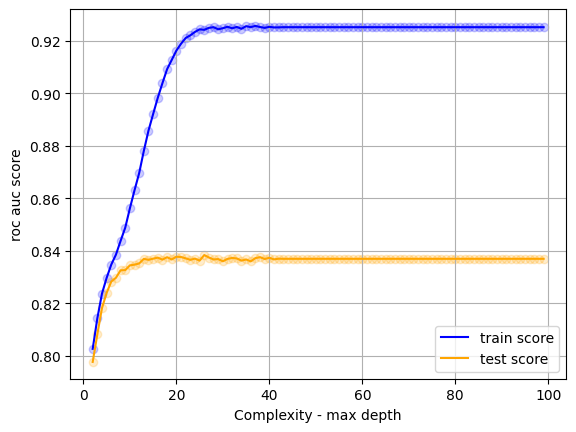

In [62]:
plt.plot(np.arange(2,100,1) , scores_train ,color='blue' , label='train score')
plt.scatter(np.arange(2,100,1) , scores_train ,color='blue' , alpha=0.2)
plt.plot(np.arange(2,100,1) , scores_test ,color='orange' , label='test score')
plt.scatter(np.arange(2,100,1) , scores_test ,color='orange' , alpha=0.2)
plt.xlabel("Complexity - max depth")
plt.ylabel("roc auc score")
plt.legend()
plt.grid(True)
plt.show()

### CURVA FUNCION COSTE

In [66]:
y_pred * np.log(y_pred_proba)

array([-0.12865203, -0.07763674, -0.        , ..., -0.07311123,
       -0.06152764, -0.06397833], shape=(17253,))

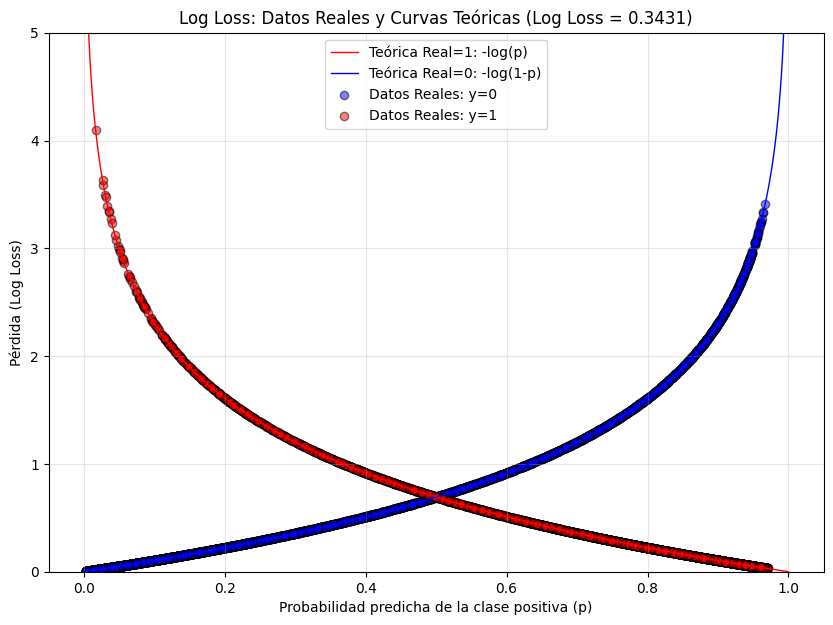

In [72]:
from sklearn.metrics import log_loss
log_loss_score=  log_loss(y_test , y_pred_proba)

# curvas teóricas
# p: Rango de probabilidades de 0 a 1 (evitando los bordes para el logaritmo)
p = np.linspace(1e-6, 1-1e-6, 500)
loss_y1 = -np.log(p)       # Pérdida teórica cuando la CLASE REAL es 1
loss_y0 = -np.log(1 - p)   # Pérdida teórica cuando la CLASE REAL es 0

# Pérdidas Reales del Modelo
# Extraemos las probabilidades donde la clase real es 0 (p0) y donde es 1 (p1)
p0 = y_pred_proba[y_test["target_binaria"] == 0]
p1 = y_pred_proba[y_test["target_binaria"] == 1]

# pérdida REAL para cada grupo:
# Si la clase real es 0, la pérdida es -log(1 - p)
loss0 = -np.log(np.clip(1 - p0, 1e-15, 1))
# Si la clase real es 1, la pérdida es -log(p)
loss1 = -np.log(np.clip(p1, 1e-15, 1))

plt.figure(figsize=(10,7))

# Curvas suaves (teóricas)
plt.plot(p, loss_y1, 'r-', linewidth=1, label="Teórica Real=1: -log(p)")
plt.plot(p, loss_y0, 'b-', linewidth=1, label="Teórica Real=0: -log(1-p)")

# Puntos reales (Scatter Plot)
# Puntos azules: Casos donde la CLASE REAL es 0.
# La pérdida es alta si p (prob. de ser 1) es alto.
plt.scatter(p0, loss0, color="blue", alpha=0.5, edgecolor="k", label="Datos Reales: y=0")
# Puntos rojos: Casos donde la CLASE REAL es 1.
# La pérdida es alta si p (prob. de ser 1) es bajo.
plt.scatter(p1, loss1, color="red", alpha=0.5, edgecolor="k", label="Datos Reales: y=1")

plt.xlabel("Probabilidad predicha de la clase positiva (p)")
plt.ylabel("Pérdida (Log Loss)")
plt.title(f"Log Loss: Datos Reales y Curvas Teóricas (Log Loss = {log_loss_score:.4f})")
plt.legend()
plt.ylim(0, 5)
plt.grid(alpha=0.3)
plt.show()
     


# TERNARIA

In [6]:
X_train = pd.read_parquet("data/X_train_ternaria.parquet")
X_test= pd.read_parquet("data/X_test_ternaria.parquet")
y_train= pd.read_parquet("data/y_train_ternaria.parquet")
y_test= pd.read_parquet("data/y_test_ternaria.parquet")
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(40257, 51) (17253, 51) (40257, 1) (17253, 1)


In [10]:
diccionario = {'Desertor': 2, 'En Curso': 1, 'Graduado': 0}
diccionario

{'Desertor': 2, 'En Curso': 1, 'Graduado': 0}

In [11]:
hiperparameters={
    'n_estimators':randint(100,1000),
    'max_depth':randint(3,20),
    'min_samples_split':randint(2,20),
    'min_samples_leaf':randint(1,10),
    'max_features':['sqrt','log2',None],
    'bootstrap':[True,False],
    'class_weight':[None,'balanced','balanced_subsample']
}
base_model=RandomForestClassifier(criterion='gini',random_state=42)

optimizacion = RandomizedSearchCV(estimator=base_model,param_distributions=hiperparameters,n_iter=20,scoring='f1_weighted',cv=5,n_jobs=10,random_state=42,verbose=2)

optimizacion.fit(X_train,y_train)
print(optimizacion.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'bootstrap': True, 'class_weight': None, 'max_depth': 17, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 221}


In [12]:
optimizacion.best_params_

{'bootstrap': True,
 'class_weight': None,
 'max_depth': 17,
 'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 221}

In [13]:
optimizacion.best_score_

np.float64(0.7778417952262154)

In [15]:
model_rf = optimizacion.best_estimator_

<Axes: >

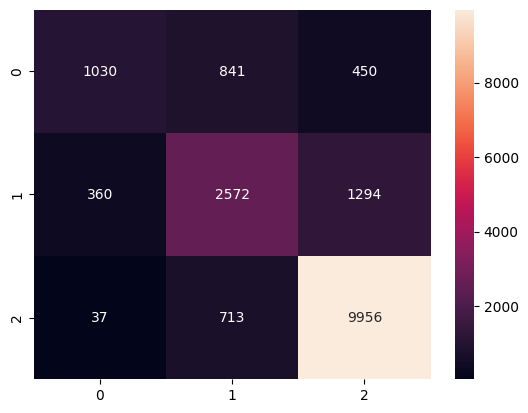

In [17]:
from sklearn.metrics import confusion_matrix 
y_pred = model_rf.predict(X_test)
sns.heatmap(confusion_matrix(y_test , y_pred) , annot=True , fmt='d')

In [29]:
model_rf.feature_importances_

array([2.80182734e-02, 2.99752501e-02, 3.34885998e-02, 2.85027529e-03,
       2.32292258e-02, 1.12625355e-02, 3.08030241e-02, 3.94767237e-03,
       3.01365067e-02, 1.64814075e-02, 3.65935001e-02, 7.83761606e-02,
       4.89718192e-01, 2.51143158e-02, 7.01192950e-03, 5.73326302e-03,
       9.33731401e-04, 2.25984590e-06, 3.76380754e-03, 6.75376571e-02,
       1.98502899e-02, 3.18249633e-05, 1.42519744e-03, 5.27210807e-03,
       5.36040689e-03, 3.72424303e-03, 3.76218902e-03, 5.34922227e-04,
       4.77498028e-04, 0.00000000e+00, 9.68141804e-05, 3.60149867e-03,
       0.00000000e+00, 2.19408546e-03, 1.45858301e-03, 6.13845934e-04,
       4.06120779e-03, 1.90259456e-05, 9.66309775e-04, 2.41827838e-03,
       6.97296580e-04, 0.00000000e+00, 2.44852770e-03, 2.80667165e-03,
       2.17170181e-03, 5.98350025e-03, 1.90256882e-03, 1.59950129e-04,
       5.02689517e-04, 1.83569375e-03, 6.45483410e-04])

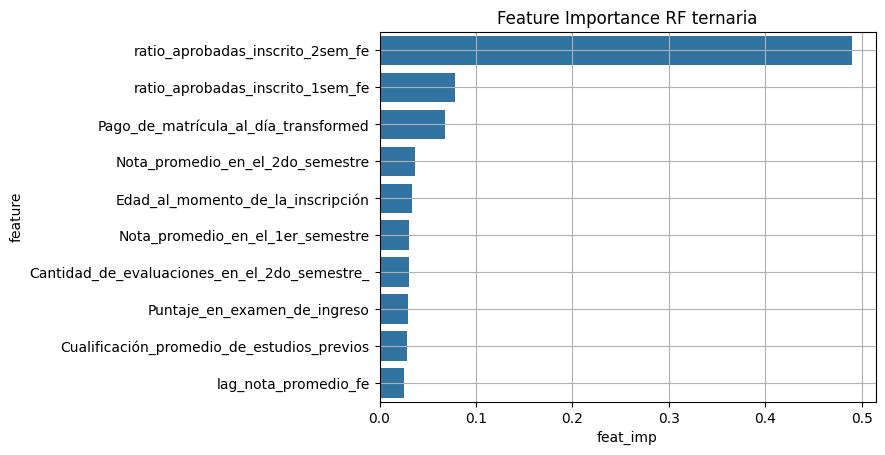

In [45]:
feat_imp=pd.DataFrame(model_rf.feature_importances_,columns=["feat_imp"])
feat_imp["feature"] = X_train.columns
sns.barplot(data=feat_imp.sort_values(by="feat_imp",ascending=False).iloc[:10] , y="feature" ,x="feat_imp")
plt.title("Feature Importance RF ternaria")
plt.grid(True)



In [51]:
optimizacion.best_params_

{'bootstrap': True,
 'class_weight': None,
 'max_depth': 17,
 'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 221}

In [52]:
params={k:optimizacion.best_params_[k] for k in optimizacion.best_params_.keys() if k != 'max_depth'}
params

{'bootstrap': True,
 'class_weight': None,
 'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 221}

In [56]:
from sklearn.metrics import f1_score
scores_train=[]
scores_test=[]
for d in range(1,50,2):
    print("**************************")
    print(f"max depth = {d}")
    model_i = RandomForestClassifier(**params , max_depth=d,random_state=42)
    model_i.fit(X_train , y_train)

    y_pred_train = model_i.predict(X_train)
    score_train = f1_score(y_train , y_pred_train , average='weighted')
    scores_train.append(score_train)

    y_pred_test = model_i.predict(X_test)
    score_test = f1_score(y_test , y_pred_test , average='weighted')
    scores_test.append(score_test)

    print(f"score train = {score_train}")
    print(f"score test = {score_test}")
    print(f"diferencia : {score_train - score_test}")


**************************
max depth = 1


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.6794408078316116
score test = 0.6811817540690136
diferencia : -0.0017409462374019524
**************************
max depth = 3


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.7339621291773287
score test = 0.7346015848760247
diferencia : -0.0006394556986959454
**************************
max depth = 5


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.7718458107060404
score test = 0.7678356661935609
diferencia : 0.0040101445124794965
**************************
max depth = 7


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.779028308514272
score test = 0.770133684031948
diferencia : 0.00889462448232392
**************************
max depth = 9


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.7955923761206736
score test = 0.7733489826513434
diferencia : 0.02224339346933013
**************************
max depth = 11


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.8117599806005841
score test = 0.7756911814396419
diferencia : 0.03606879916094219
**************************
max depth = 13


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.8250526916277121
score test = 0.77633849987091
diferencia : 0.04871419175680214
**************************
max depth = 15


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.8337060718062573
score test = 0.7764519487358396
diferencia : 0.05725412307041777
**************************
max depth = 17


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.8395515191600766
score test = 0.7762591350509271
diferencia : 0.0632923841091495
**************************
max depth = 19


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.8422946718648318
score test = 0.7764611190229825
diferencia : 0.06583355284184922
**************************
max depth = 21


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.8432275930835704
score test = 0.7766890058331595
diferencia : 0.06653858725041095
**************************
max depth = 23


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.8440565385725926
score test = 0.7764625780873167
diferencia : 0.06759396048527588
**************************
max depth = 25


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.8441024480043048
score test = 0.7767119138529502
diferencia : 0.06739053415135454
**************************
max depth = 27


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.8441555012240294
score test = 0.7767673034595681
diferencia : 0.06738819776446126
**************************
max depth = 29


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.8442348586572704
score test = 0.7766353875174887
diferencia : 0.06759947113978171
**************************
max depth = 31


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.8442125501830344
score test = 0.7766353875174887
diferencia : 0.0675771626655457
**************************
max depth = 33


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.8442139802219985
score test = 0.7766353875174887
diferencia : 0.06757859270450972
**************************
max depth = 35


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.8442125501830344
score test = 0.7766353875174887
diferencia : 0.0675771626655457
**************************
max depth = 37


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.8442125501830344
score test = 0.7766353875174887
diferencia : 0.0675771626655457
**************************
max depth = 39


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.8442125501830344
score test = 0.7766353875174887
diferencia : 0.0675771626655457
**************************
max depth = 41


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.8442125501830344
score test = 0.7766353875174887
diferencia : 0.0675771626655457
**************************
max depth = 43


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.8442125501830344
score test = 0.7766353875174887
diferencia : 0.0675771626655457
**************************
max depth = 45


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.8442125501830344
score test = 0.7766353875174887
diferencia : 0.0675771626655457
**************************
max depth = 47


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.8442125501830344
score test = 0.7766353875174887
diferencia : 0.0675771626655457
**************************
max depth = 49


c:\Users\chris\Data_science\Ms Data Mining UBA\2do_Cuatrimestre\AA\TPs\student-retention-ml\env_ml\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.8442125501830344
score test = 0.7766353875174887
diferencia : 0.0675771626655457


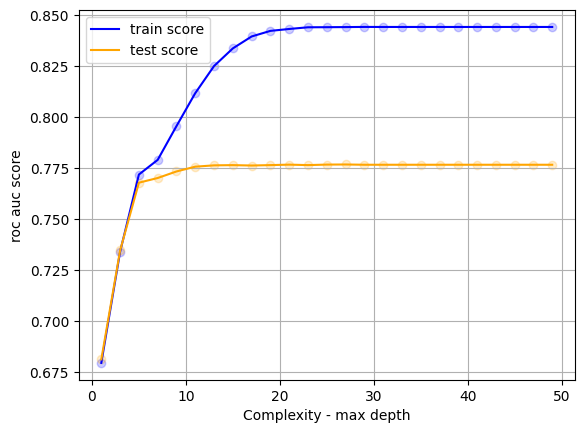

In [57]:
plt.plot(np.arange(1,50,2) , scores_train ,color='blue' , label='train score')
plt.scatter(np.arange(1,50,2) , scores_train ,color='blue' , alpha=0.2)
plt.plot(np.arange(1,50,2), scores_test ,color='orange' , label='test score')
plt.scatter(np.arange(1,50,2), scores_test ,color='orange' , alpha=0.2)
plt.xlabel("Complexity - max depth")
plt.ylabel("roc auc score")
plt.legend()
plt.grid(True)
plt.show()